In [25]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.patheffects as PathEffects
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
df_embeddings = pd.read_csv('dlss-project24/output/embeddings/embeddings_CBOW_total_posts.csv')
posts = pd.read_csv('data/preprocessed_posts.csv')

In [30]:
# Drop the non-numerical 'word' column
X = df_embeddings.drop(columns=['word'])
X_standardized = StandardScaler().fit_transform(X)

In [33]:
# Create list of sentences and list of words
lemmatized_posts = posts["title_and_text_lemmatized"].tolist()
post_corpus = [doc.split() for doc in lemmatized_posts]

# Get unnested list of words
word_list = []
for sublist in post_corpus:
    word_list.extend(sublist)

In [36]:
lemmatized_posts = lemmatized_posts[:100]

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Step 1: Create a document-term matrix
vectorizer = CountVectorizer(stop_words='english')
doc_term_matrix = vectorizer.fit_transform(lemmatized_posts)

# Step 2: Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=0)  # Adjust n_components for the number of topics
lda.fit(doc_term_matrix)

# Step 3: Get the topics
topics = lda.components_

# Step 4: Print the top words for each topic
n_top_words = 10
vocab = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(topics):
    print(f"Topic #{topic_idx + 1}:")
    print(" ".join([vocab[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print("\n")

Topic #1:
change climate water care people human help make day fact


Topic #2:
climate change predict body migrant infotainment big weather team atmosphere


Topic #3:
climate change global christian consider pilot wrong airline spur official


Topic #4:
change climate natural raise earth lego supporter come weather giant


Topic #5:
change climate temperature problem friend start kid talk just year




c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


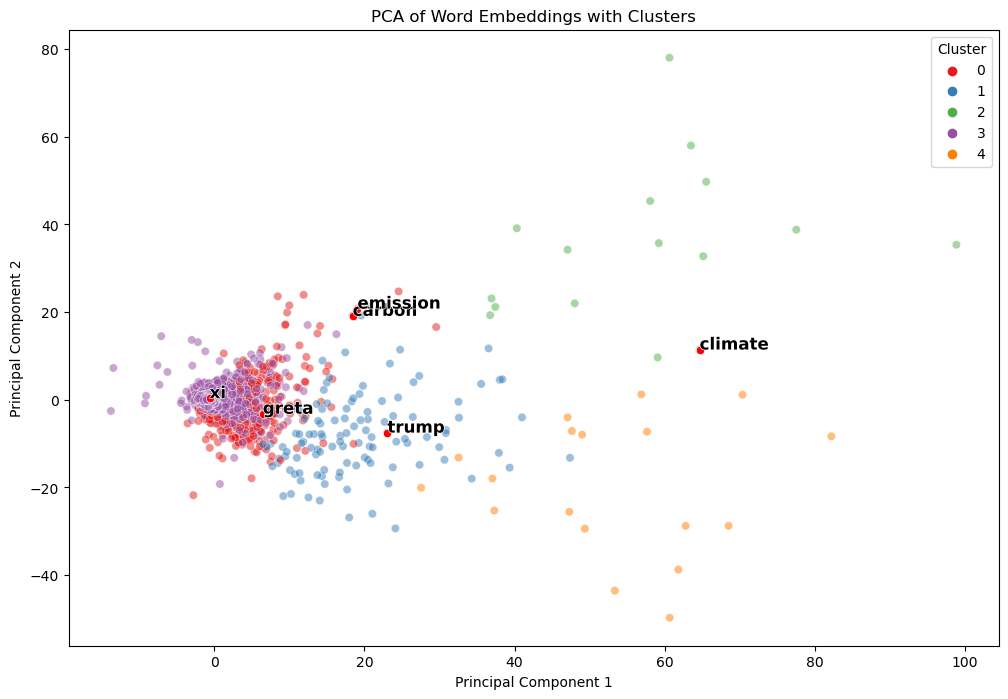

In [32]:
# Step 1: Apply K-Means clustering
n_clusters = 5  # Adjust the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X_standardized)

# Step 2: Assign each word to a cluster
pca_df['cluster'] = kmeans.labels_

# Step 3: Plot the clusters in the PCA plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', palette='Set1', data=pca_df, alpha=0.5)

# Highlight the selected words in a different color
sns.scatterplot(x='PC1', y='PC2', data=highlight_df, color='red')

# Annotate the points with the selected word labels
for i in range(highlight_df.shape[0]):
    txt = plt.text(x=highlight_df.PC1.iloc[i], y=highlight_df.PC2.iloc[i], s=highlight_df.word.iloc[i], 
                   fontdict=dict(color='black', size=12, weight='bold'))
    
    # Add a white outline to the text for better visibility
    txt.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='white')])

plt.title('PCA of Word Embeddings with Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster")
plt.show()